<a href="https://colab.research.google.com/github/Azariagmt/Telecom-Analysis/blob/notebooks/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####  top 3 handset manufacturers


In [ ]:
n = 3
top_3_handsets = df_clean[df_clean['Handset Manufacturer'] != 'undefined']['Handset Manufacturer'].value_counts()[:n].index.tolist()
top_3_handsets

['Apple', 'Samsung', 'Huawei']

In [ ]:
df_clean['Handset Manufacturer'].value_counts()[:3]

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

#### top 10 handsets used by the customers

In [ ]:
n = 10
df_clean[df_clean['Handset Type'] != 'undefined']['Handset Type'].value_counts()[:n].index.tolist()

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)',
 'Apple iPhone 8 (A1905)',
 'Apple iPhone Xr (A2105)',
 'Samsung Galaxy S8 (Sm-G950F)',
 'Apple iPhone X (A1901)',
 'Samsung Galaxy A5 Sm-A520F']

####  top 5 handsets per top 3 handset manufacturer


In [ ]:
n = 5
for manufacturer in top_3_handsets:
  handsets = top_3_handsets_df[top_3_handsets_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts()[:n].index.tolist()
  for item in handsets:
    val = top_3_handsets_df[top_3_handsets_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts()[item]
    print(f'{item} with {val} number of devices')

Apple iPhone 6S (A1688) with 9419 number of devices
Apple iPhone 6 (A1586) with 9023 number of devices
Apple iPhone 7 (A1778) with 6326 number of devices
Apple iPhone Se (A1723) with 5187 number of devices
Apple iPhone 8 (A1905) with 4993 number of devices
Samsung Galaxy S8 (Sm-G950F) with 4520 number of devices
Samsung Galaxy A5 Sm-A520F with 3724 number of devices
Samsung Galaxy J5 (Sm-J530) with 3696 number of devices
Samsung Galaxy J3 (Sm-J330) with 3484 number of devices
Samsung Galaxy S7 (Sm-G930X) with 3199 number of devices
Huawei B528S-23A with 19752 number of devices
Huawei E5180 with 2079 number of devices
Huawei P20 Lite Huawei Nova 3E with 2021 number of devices
Huawei P20 with 1480 number of devices
Huawei Y6 2018 with 997 number of devices


#### number of xDR sessions

In [ ]:
# df.copy()
# 150001
len(df_clean)

148935

just saw that there is a duration column

#### total download (DL) and upload (UL) data


In [ ]:
df['HTTP DL (Bytes)'].sum()

7844355841219.0

In [ ]:
df['HTTP UL (Bytes)'].sum()

221095773736.0

#### total data volume (in Bytes) during this session for each application

In [ ]:
social_medias = ['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']
social_media_object = []
for social_media in social_medias:
  print(f'{df[social_media]} has {df[social_media].sum()} Bytes used in session')
  social_media_object.append((social_media, df[social_media].sum()))
print(social_media_object)

1970-01-01 00:00:00.000000000    1.545765e+06
1970-01-01 00:00:00.000000001    1.926113e+06
1970-01-01 00:00:00.000000002    1.684053e+06
1970-01-01 00:00:00.000000003    6.441210e+05
1970-01-01 00:00:00.000000004    8.626000e+05
                                     ...     
1970-01-01 00:00:00.000149996    3.464974e+06
1970-01-01 00:00:00.000149997    2.344568e+06
1970-01-01 00:00:00.000149998    1.245845e+06
1970-01-01 00:00:00.000149999    8.015470e+05
1970-01-01 00:00:00.000150000    1.795322e+06
Name: Social Media DL (Bytes), Length: 150001, dtype: float64 has 269300061368.77365 Bytes used in session
1970-01-01 00:00:00.000000000    24420.00000
1970-01-01 00:00:00.000000001    7165.00000 
1970-01-01 00:00:00.000000002    42224.00000
1970-01-01 00:00:00.000000003    13372.00000
1970-01-01 00:00:00.000000004    50188.00000
                                    ...     
1970-01-01 00:00:00.000149996    52091.00000
1970-01-01 00:00:00.000149997    7613.00000 
1970-01-01 00:00:00.0001499

### Non graphical Univariate analysis

In [ ]:
df[['duration',"Total DL (Bytes)",'Total UL (Bytes)']].describe()

,duration,Total DL (Bytes),Total UL (Bytes)
count,1.500000e+05,1.500000e+05,1.500000e+05
mean,1.046091e+05,4.546434e+08,4.112121e+07
std,8.103761e+04,2.441429e+08,1.127639e+07
min,7.143000e+03,7.114041e+06,2.866892e+06
25%,5.744075e+04,2.431068e+08,3.322201e+07
50%,8.640000e+04,4.558411e+08,4.114331e+07
75%,1.324302e+05,6.657055e+08,4.903424e+07
max,1.859337e+06,9.029696e+08,7.833131e+07


In [ ]:
df[social_medias].describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Graphical Univariate Analysis

In [ ]:
# df[['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']]
scaled_df
df[['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']]
df[["HTTP DL (Bytes)",'HTTP UL (Bytes)']].isnull().sum()
graph_df = df[df[["duration","Total UL (Bytes)",'Total DL (Bytes)']].notnull()]


In [ ]:
graph_df = graph_df[["duration","Total UL (Bytes)",'Total DL (Bytes)']]
graph_df

,duration,Total UL (Bytes),Total DL (Bytes)
1970-01-01 00:00:00.000000000,1823653.0,36749741.0,308879636.0
1970-01-01 00:00:00.000000001,1365104.0,53800391.0,653384965.0
1970-01-01 00:00:00.000000002,1361762.0,27883638.0,279807335.0
1970-01-01 00:00:00.000000003,1321510.0,43324218.0,846028530.0
1970-01-01 00:00:00.000000004,1089009.0,38542814.0,569138589.0
...,...,...,...
1970-01-01 00:00:00.000149996,81231.0,57628851.0,574175259.0
1970-01-01 00:00:00.000149997,97971.0,39135081.0,666648844.0
1970-01-01 00:00:00.000149998,98249.0,34912224.0,592786405.0
1970-01-01 00:00:00.000149999,97911.0,29626096.0,371895920.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    # fig, ax = plt.subplots(1,2, figsize=(10, 6))
    # sns.histplot(df[['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']], ax=ax[0])
    # ax[0].set_title("Original Data")
    # sns.histplot(scaled_data, ax=ax[1])
    # ax[1].set_title("Scaled data")
    return scaled_data
    
scaled_data = scaler(graph_df)
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = ['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']

,duration,HTTP DL (Bytes),HTTP UL (Bytes)


In [ ]:
scaled_df = scaled_df.dropna()
scaled_df['duration'].isnull().sum()

0

In [ ]:
scaled_df.describe()

,duration,HTTP DL (Bytes),HTTP UL (Bytes)
count,150000.000000,150000.000000,150000.000000
mean,0.052622,0.506919,0.499555
std,0.043752,0.149427,0.272525
min,0.000000,0.000000,0.000000
25%,0.027156,0.402244,0.263427
50%,0.042791,0.507211,0.500892
75%,0.067643,0.611776,0.735154
max,1.000000,1.000000,1.000000


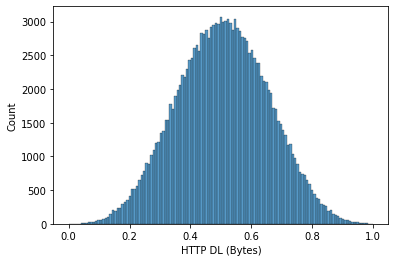

In [ ]:
sns.histplot(scaled_df['HTTP DL (Bytes)'])

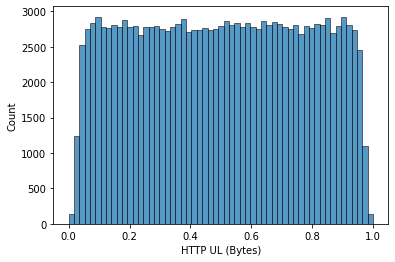

In [ ]:
sns.histplot(scaled_df['HTTP UL (Bytes)'])

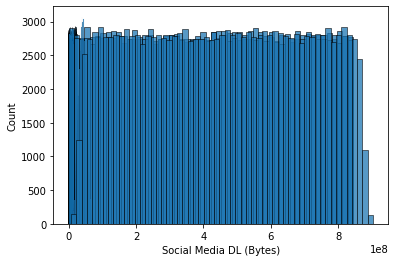

In [ ]:
for social_media in social_medias:
  sns.histplot(df[social_media])

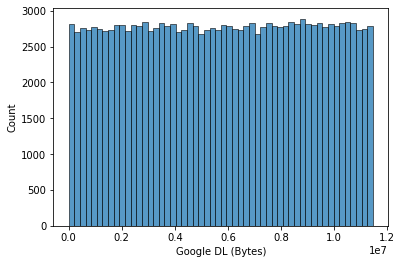

In [ ]:
sns.histplot(df['Google DL (Bytes)'])

In [ ]:
scaled_df = df[Google DL (Bytes)]

SyntaxError: ignored

In [ ]:
social_medias

['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [ ]:
scaled_df

,duration,HTTP DL (Bytes),HTTP UL (Bytes)
0,0.980734,0.448991,0.336846
1,0.733163,0.674934,0.721401
2,0.731359,0.331504,0.304394
3,0.709627,0.536111,0.936439
4,0.584100,0.472752,0.627361
...,...,...,...
149995,0.028315,0.674205,0.906287
149996,0.040000,0.725666,0.632983
149997,0.049038,0.480600,0.736207
149998,0.049188,0.424642,0.653758


In [ ]:
df[social_medias]

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
1970-01-01 00:00:00.000000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1970-01-01 00:00:00.000000001,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
1970-01-01 00:00:00.000000002,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
1970-01-01 00:00:00.000000003,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
1970-01-01 00:00:00.000000004,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000149996,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
1970-01-01 00:00:00.000149997,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
1970-01-01 00:00:00.000149998,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
1970-01-01 00:00:00.000149999,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

In [ ]:
social_medias

['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

Minimum:12.00
Mean:1795321.77
Median:1794369.00
Mode:152013.00
Maximum:3586064.00

Minimum:0.00
Mean:32928.43
Median:32920.00
Mode:30810.00
Maximum:65870.00

Minimum:207.00
Mean:5750752.62
Median:5765829.00
Mode:3991481.00
Maximum:11462832.00

Minimum:3.00
Mean:2056541.93
Median:2054573.00
Mode:3426526.00
Maximum:4121357.00

Minimum:14.00
Mean:1791728.87
Median:1793505.00
Mode:1829513.00
Maximum:3586146.00

Minimum:2.00
Mean:467373.44
Median:466250.00
Mode:53137.00
Maximum:936418.00

Minimum:53.00
Mean:11634072.50
Median:11616019.00
Mode:18869169.00
Maximum:23259098.00

Minimum:105.00
Mean:11009410.13
Median:11013447.00
Mode:3398443.00
Maximum:22011962.00

Minimum:42.00
Mean:11626851.72
Median:11642217.00
Mode:2097111.00
Maximum:23259189.00

Minimum:35.00
Mean:11001754.82
Median:10996384.00
Mode:1751610.00
Maximum:22011955.00

Minimum:2516.00
Mean:422044702.60
Median:423408104.00
Mode:88731721.00
Maximum:843441889.00

Minimum:59.00
Mean:8288398.11
Median:8291208.00
Mode:15304673.00
Max

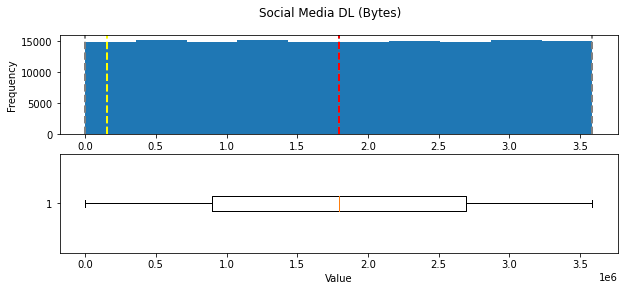

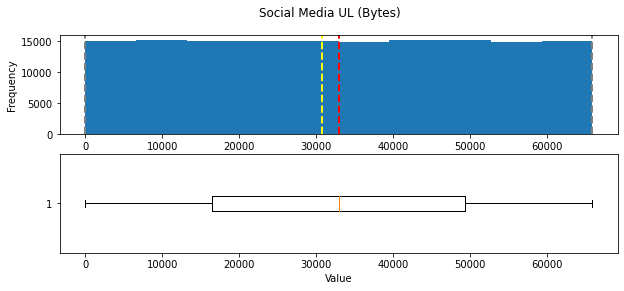

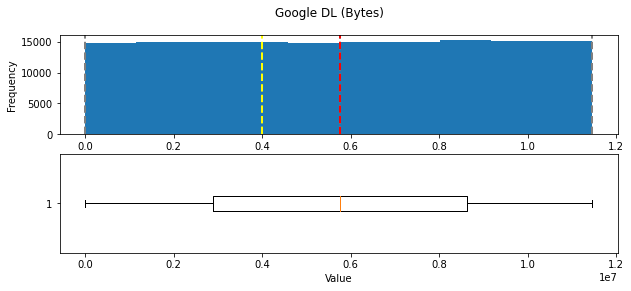

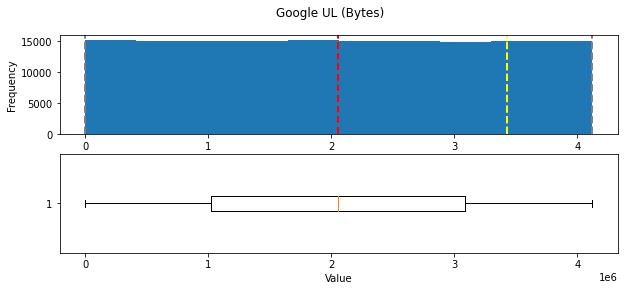

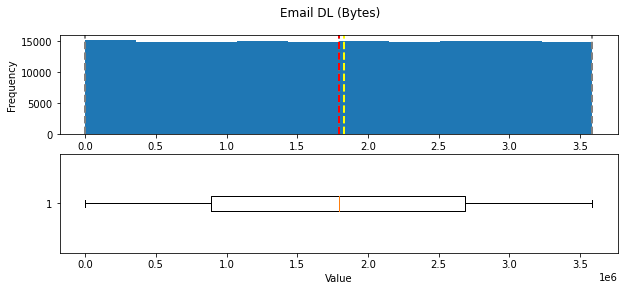

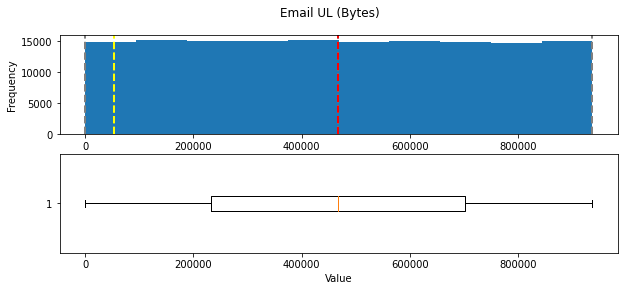

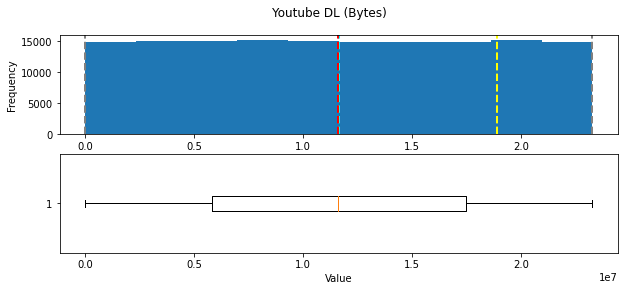

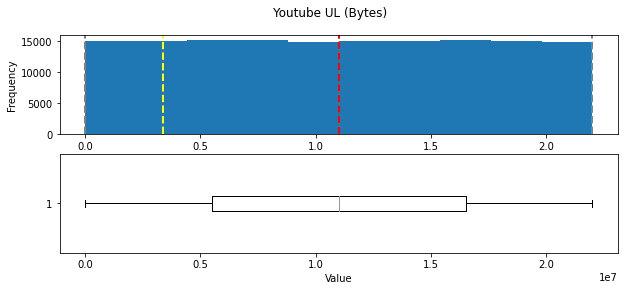

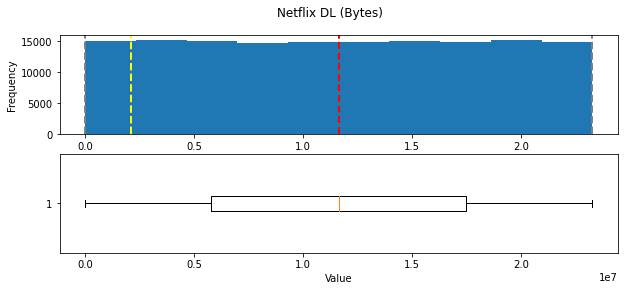

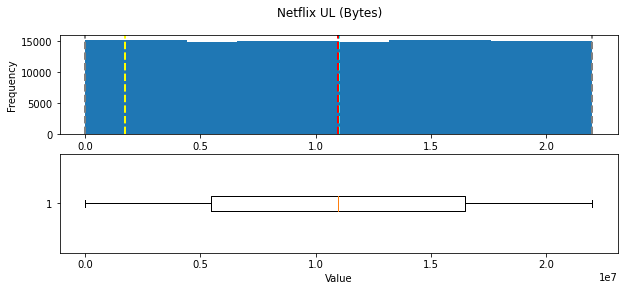

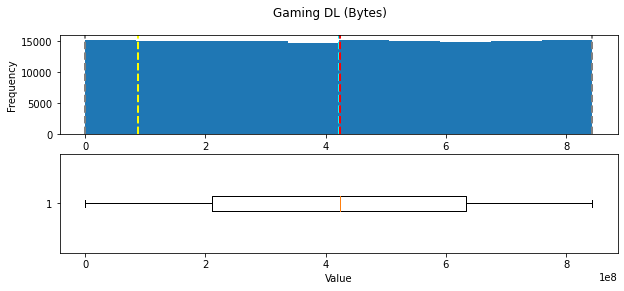

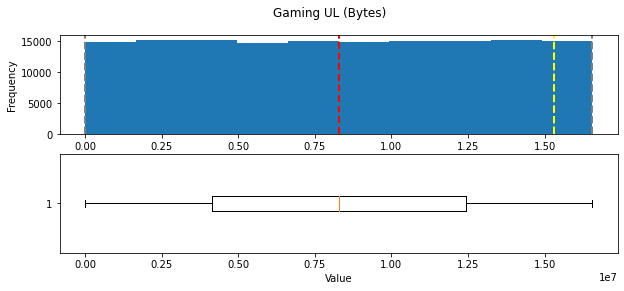

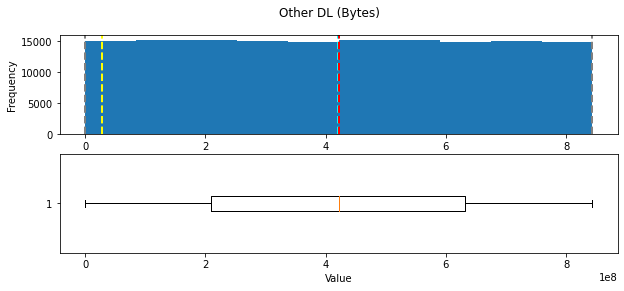

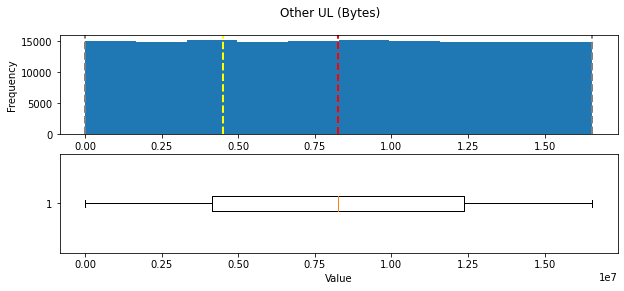

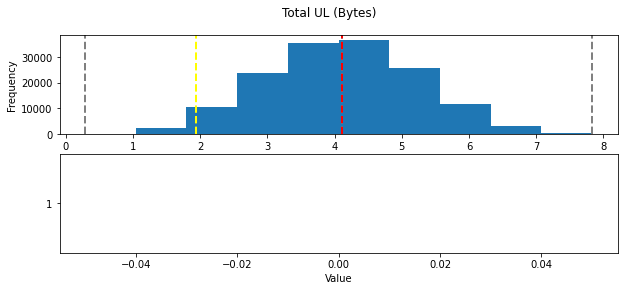

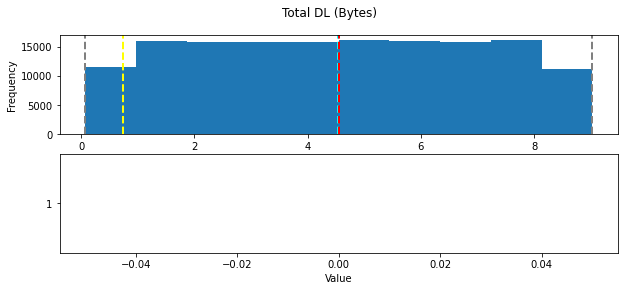

In [ ]:
for media in social_medias:
  show_distribution(df[media])

### Data consumption

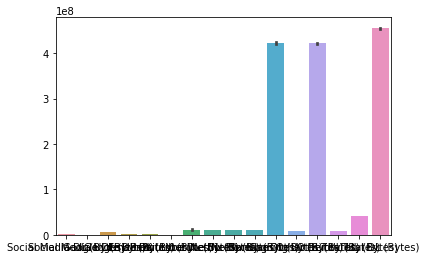

In [ ]:
g = sns.barplot(data=df[social_medias])

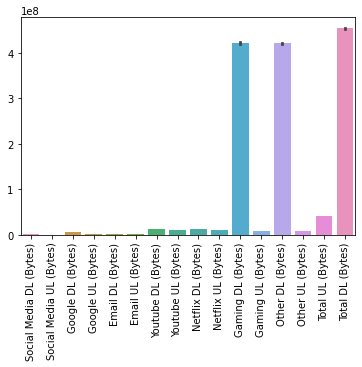

In [ ]:
import matplotlib.pyplot as plt
g = sns.barplot(data=df[social_medias])
g.set_xticklabels(labels=social_medias,rotation=90)
plt.show()

In [ ]:
social_media_object

[('Social Media DL (Bytes)', 269300061368.77365),
 ('Social Media UL (Bytes)', 4939298085.43438),
 ('Google DL (Bytes)', 862618643645.6193),
 ('Google UL (Bytes)', 308483345484.9263),
 ('Email DL (Bytes)', 268761121931.868),
 ('Email UL (Bytes)', 70106483664.44194),
 ('Youtube DL (Bytes)', 1745122509657.504),
 ('Youtube UL (Bytes)', 1651422529615.1348),
 ('Netflix DL (Bytes)', 1744039384662.7188),
 ('Netflix UL (Bytes)', 1650274224700.8196),
 ('Gaming DL (Bytes)', 63307127434008.59),
 ('Gaming UL (Bytes)', 1243268005008.1108),
 ('Other DL (Bytes)', 63165502729718.195),
 ('Other UL (Bytes)', 1239728178463.4243),
 ('Total UL (Bytes)', 6168180943816.0),
 ('Total DL (Bytes)', 68196514511845.0)]

['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
[269300061368.77365, 4939298085.43438, 862618643645.6193, 308483345484.9263, 268761121931.868, 70106483664.44194, 1745122509657.504, 1651422529615.1348, 1744039384662.7188, 1650274224700.8196, 63307127434008.59, 1243268005008.1108, 63165502729718.195, 1239728178463.4243, 6168180943816.0, 68196514511845.0]


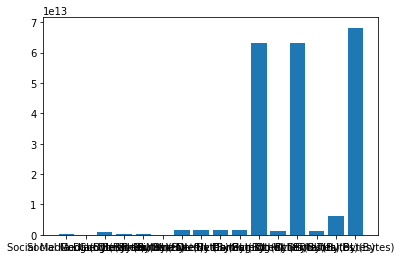

In [ ]:
import matplotlib.pyplot as plt
labels = [media[0] for media in social_media_object]
print(labels)
data = [data[1] for data in social_media_object]
print(data)
# g = sns.barplot(data=data)
# g.set_xticklabels(labels=labels,rotation=90)
plt.bar(x=labels, height=data)
plt.show()